# Assignment 5 - Expectation Maximization

## Overview

Automatic image processing is a key component to many AI systems, including facial recognition and video compression, instance segmentation of images and point cloud data. One basic method for processing is segmentation, by which we divide an image into a fixed number of components in order to simplify its representation. For example, we can train a mixture of Gaussians to represent an image, and segment it according to the simplified representation as shown in the images below.

![alt text](images/k6_Starry.png)

Or we could perform a clustering of point cloud in order to separate different objects, backgrounds etc, as shown in the image below

![alt text](images/pcd_clustered.gif)

In this assignment, you will learn to perform image compression and point cloud segmentation. To this end, you will implement Gaussian mixture models and iteratively improve their performance. First you will perform segmentation on the "Starry" (`Starry.png`) and at the end run your algorithm on 3D point cloud data.

To begin, you will implement several methods of image segmentation, with increasing complexity:

1. Implement k-means clustering to segment a color image.

2. Familiarize yourself with the algorithm by running it on simple dataset.

3. Build a Gaussian mixture model to be trained with expectation-maximization.

4. Experiment with varying the details of the Gaussian mixture model’s implementation.

5. Implement and test a new metric called the Bayesian information criterion, which guarantees a more robust image segmentation.

<br>

- - -

## Part 0: NumPy

The concept of Vectorization was introduced in the last section of Assignment 4. For this assignment, please vectorize your code wherever possible using numpy arrays, instead of running for-loops over the images being processed.

For example of how this might be useful, consider the following array:
A = [12 34 1234 764 ...(has a million values)... 91, 78]

Now you need to calculate another array B, which has the same dimensions as A above. Say each value in B is calculated as follows:
(each value in B) = square_root_of(some constants pi log(k) * (each value in A))/7

You might wish to use a for-loop to compute this. However, it will take really long to run on an array of this magnitude.
Alternatively, you may choose to use numpy and perform this calculation in a single line. You can pass A as a numpy array and the entire calculation will be done in a line, resulting in B being populated with the corresponding values that come out of this formula.

Check out **Basic Operation** section of the Numpy Tutorial if you are not familiar with numpy vector/matrix operations: https://docs.scipy.org/doc/numpy/user/quickstart.html#basic-operations. Please do check the resources linked in the assignment github readme.

#### Please note that numpy.vectorize DOES NOT perform vectorization, it only does a loop. 


Let's look at a few examples below. 

#### Element wise multiply
Use np.multiply or operator * to perform element wise multiplication.

In [1]:
import numpy as np
x = np.array([[1,2,3,4], 
              [5,6,7,8]])
y = np.array([[1,2,3,4], 
              [5,6,7,8]])
output_multiply = np.multiply(x, y)
output_op = x * y
print(f'using np.multiply()    \n {output_multiply}')
print(f'using *  \n {output_op}')

using np.multiply()    
 [[ 1  4  9 16]
 [25 36 49 64]]
using *  
 [[ 1  4  9 16]
 [25 36 49 64]]


In [6]:
# in this case we can also do np.power, which is an element wise function that raise each entry of the array to the power of given number. Note a and b defined above are the same.͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
output_power = np.power(x, 2)
print(f'using np.power  \n {output_power}')

using np.power  
 [[ 1  4  9 16]
 [25 36 49 64]]


#### Inner product
Use np.dot() or self.dot() to perform inner product between vectors. There are some nauance between 1d vector and higher dimension arrays.  

In [7]:
p = np.array([1,2,3,4])
q = np.array([5,6,7,8])
output_dot = np.dot(p, q)
output_sdot = p.dot(q)
print(f'using np.dot()    \n {output_dot}')
print(f'using self.dot()  \n {output_sdot}')

using np.dot()    
 70
using self.dot()  
 70


In [8]:
m = np.array([[1,2,3,4]])
n = np.array([[5,6,7,8]])
output_ndot = np.dot(m, n.T)
output_nsdot = m.dot(n.T)
print(f'using np.dot()    \n {output_ndot}')
print(f'using self.dot()  \n {output_nsdot}')

using np.dot()    
 [[70]]
using self.dot()  
 [[70]]


Technically, in the above example, a and b are 1 x 4 matrices. So we have to perform a transpose on b to align the dimension for matrix multiplication. More examples on Matrix multiplication are in the following.

#### Matrix multiplication
There are many ways to do matrix multiplication in Numpy. Notebly you can do np.dot(), self.dot(), operator '@', np.matmul, or einsum.

In [9]:
x = np.array([[1,2,3,4], 
              [5,6,7,8]])
y = np.array([[1,2,3,4], 
              [5,6,7,8]])
output_ndot = np.dot(x, y.T)
output_nsdot = x.dot(y.T)
output_nop = x @ y.T
output_matmul = np.matmul(x, y.T)
output_esum = np.einsum('ij, jk-> ik', x, y.T)
print(f'using np.dot()    \n {output_ndot}')
print(f'using self.dot()  \n {output_nsdot}')
print(f'using operator @  \n {output_nop}')
print(f'using np.matmul  \n {output_matmul}')
print(f'using np.einsum  \n {output_esum}')

using np.dot()    
 [[ 30  70]
 [ 70 174]]
using self.dot()  
 [[ 30  70]
 [ 70 174]]
using operator @  
 [[ 30  70]
 [ 70 174]]
using np.matmul  
 [[ 30  70]
 [ 70 174]]
using np.einsum  
 [[ 30  70]
 [ 70 174]]


#### Einsum
Note einsum can do a lot more. For full documentation, see https://numpy.org/doc/stable/reference/generated/numpy.einsum.html. Some good examples are listed in https://stackoverflow.com/questions/26089893/understanding-numpys-einsum, https://rockt.github.io/2018/04/30/einsum.

In [10]:
# a and b are defined same as before͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
m, n = 1000, 500

x = np.random.rand(m, n)
y = np.random.rand(m, n)
# trace of the matrix multiplication͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
output_trace_fast = np.einsum('ij, ji->', x, y.T)
print(f'Trace of the product of x and y: {output_trace_fast}')
# compare time spent on computing͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃ 
# trace of the matrix multiplication͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# vanilla͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
%timeit np.trace(x.dot(y.T))
# einsum͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
%timeit output_trace_fast = np.einsum('ij, ji->', x, y.T)

Trace of the product of x and y: 125058.3919006648
13.7 ms ± 963 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
229 µs ± 4.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Additional useful NumPy tricks and functions


#### Indexing

In [11]:
# axis wise͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
x = np.random.rand(50, 50, 50)
y = x[0, :, :]

# reverse order͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
x = np.arange(10)
print(x)
# general rule: start:end:step, a negative step means reverse͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
print(x[::-1])

# conditional indexing and np.where͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
x = np.arange(10)
print(x==1)
print(np.where(x==1))
# replace the entry where x has value 1, with a new value of 11͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# note the second and third arguments are for values where the condition fails !(x!=1) = x==1͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
print(np.where(x!=1, x, 11))

[0 1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1 0]
[False  True False False False False False False False False]
(array([1], dtype=int64),)
[ 0 11  2  3  4  5  6  7  8  9]


#### A list of useful functions and operators
1. `np.concatenate()` - let you put together two arrays along certain axis
2. `np.zeros(), np.ones()` - create array of zeros and ones with specified dimension
3. `x[start:end]` - slicing an array from 'start' position to 'end' position, can be used for different axises
4. `np.diagonal()` - create a matrix with diagonal element specified (a 1-D array). Will return diagonal elements when passing high dimensional arraies.
5. `np.reshape()` - reshape the dimension of your array

## Part 1: K-means Clustering (39 pts)

One easy method for image segmentation is to simply cluster all similar data points together and then replace their values with the mean value. Thus, we'll warm up using k-means clustering. This will also provide a baseline to compare with your segmentation. Please note that clustering will come in handy later.

Fill out `get_initial_means()`, `k_means_step()` functions below.

In `get_initial_means()`, you should choose  k random points from the data (without replacement) to use as initial cluster means.

Your code will be unit tested automatically when you run the cell (`Cell > Run Cells OR Shift + Enter`).

#### Try to vectorize the code for it to run faster. Without vectorization it takes 25-30 minutes for the code to run.


In [2]:
%load_ext autoreload
%autoreload 2
# Run this cell and check if you have all necessary modules͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
from ipywidgets import *
import mixture_tests as tests
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from scipy.stats import norm

import os
import numpy as np
from helper_functions import *
# Please don't modify this cell͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

In [13]:
#export
import numpy as np
from helper_functions import *

In [3]:
#export
def get_initial_means(array, k):
    """
    Picks k random points from the 2D array 
    (without replacement) to use as initial 
    cluster means

    params:
    array = numpy.ndarray[numpy.ndarray[float]] - m x n | datapoints x features

    k = int

    returns:
    initial_means = numpy.ndarray[numpy.ndarray[float]]
    """
    # targets = [int(np.random.rand() * 10) for i in range(k)]
    # return(array[targets])
    N = array.shape[0]
    indx = np.random.choice(N,size = k, replace = False)

    return(array[indx,:])
    
########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.K_means_test().test_initial_means(get_initial_means)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


In [3]:
#export
def compute_distance(X, centroids, k):
    #Used by ML course HW distance calculation.    
    distance = np.zeros((X.shape[0], k))
    for k in range(k):
        row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
        distance[:, k] = np.square(row_norm)
    return distance

def k_means_step(X, k, means):
    """
    A single update/step of the K-means algorithm
    Based on a input X and current mean estimate,
    predict clusters for each of the pixels and 
    calculate new means. 
    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n | pixels x features (already flattened)
    k = int
    means = numpy.ndarray[numpy.ndarray[float]] - k x n

    returns:
    (new_means, clusters)
    new_means = numpy.ndarray[numpy.ndarray[float]] - k x n
    clusters = numpy.ndarray[int] - m sized vector
    """
    
    distance = compute_distance(X, means, k)
    y = np.argmin(distance, axis=1)
    
    new_mean = np.zeros((k, X.shape[1]))
    for k_ in range(k):
        new_mean[k_, :] = np.mean(X[y == k_, :], axis=0)
    
    return(new_mean, y)

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.K_means_test().test_k_means_step(k_means_step)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


#### K-means - Visualizing the results

Now that you are done with the K-means step implementation lets try to visualize what's happening if you repeat these steps multiple times.

**You don't need to be implementing anything in the next cells until Image Segmentation Section**, but you are highly encouraged to play with parameters and datasets, to get a sense of what is happening at every algorithm iteration step.

Feel free to explore and improve the function below, it will be used for visualizing K-means progress
but it's not required and WON'T effect your grade.

In [26]:
# This cell contains a code for loading a dataset from the `data` folder͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# Each of these datasets contains synthtic (generated) data͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# You can simply run this cell for now and come back to it later if you want to make changes͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# Make sure you implemented everything in cells above and passed the unittests͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
def K_means_2D_dataset(dataset_index, K):
    # Load the dataset from data folder͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    X = np.loadtxt("data/%d_dataset_X.csv" % dataset_index, delimiter=",")
    print("The dataset is of a size:", X.shape)

    # Load the labels͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    # Clustering is unsupervised method, where no labels are provided͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    # However, since we generated the data outselves we know the clusters,͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    # and load them for illustration purposes.͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    y = np.int16(np.loadtxt("data/%d_dataset_y.csv" % dataset_index, delimiter=","))

    # Feel free to edit the termination condition for the K-means algorithm͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    # Currently is just runs for n_iterations, before terminating͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    n_iterations = 10
    m,n = X.shape
    means = get_initial_means(X,K)
    clusters = np.zeros([n])
    # keeping track of how clusters and means changed, for visualization purposes͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    means_history = []
    clusters_history = [clusters] 
    for iteration_i in range(n_iterations):
        means, clusters = k_means_step(X, K, means)
        clusters_history.append(clusters)
        means_history.append(means)

    return X, y, means_history, clusters_history

# Things to try:͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# - Try different initialization to see check initialization robustness͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# - Improve the termination condition (you will be able to reuse later as well!)͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# - Try creating you own dataset in the `data/` folder͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃ 

In [27]:
# RUN - TRY DIFFERENT PARAMETERS - REPEAT͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
dataset_index = 3 # for different dataset change it to number from [0,4]
K = 3 # Number of clusters - play with this number

X, y, means_history, clusters_history = K_means_2D_dataset(dataset_index, K)
print(len(clusters_history))
print(X)
# This is an interactive cell to see the progress of training your K-means algorithm.͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# Feel free to improve the visualization code and share it with your classmates on Piazza͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
def get_cluster(i):
    clusters = clusters_history[i] # Get the clusters from K-means' i-th iteration
    means = means_history[i] # Get the clusters from K-means' i-th iteration
    # print(means)
    plt.figure(None, figsize=(15,6)) # Set the plot size
    plt.suptitle('Drag the slider to see the algorthm training progress')
    ax1=plt.subplot(1, 2, 1)
    ax1.set_title('K-means clusters - step %d' % i)
    for k in range(K):
        print(f'k is {k}')
        plt.plot(X[clusters==k,0], X[clusters==k,1], '.') # 
        plt.plot(means[k,0], means[k,1], '.')
        # Try to plot the centers of the clusters͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃ 
        # You can access them by calling means_history[i]͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
        # How could you plot the area that belong to that cluster?͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

    # Just to get a flavour of how the data looks like͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    ax2=plt.subplot(1, 2, 2)
    ax2.set_title('Ground truth clusters')
    for i in np.unique(y):
        ax2.plot(X[y==i,0],X[y==i,1],'.')

    plt.show()

interactive(get_cluster, i=(1,len(clusters_history)-1,1))

The dataset is of a size: (1000, 2)
11
[[-9.08206201 12.28718687]
 [-2.61266296  2.31053252]
 [-3.59772263  3.67255689]
 ...
 [-9.79077555 13.34516013]
 [-6.45777427  7.91273651]
 [-2.73987872  3.3500109 ]]


interactive(children=(IntSlider(value=5, description='i', max=10, min=1), Output()), _dom_classes=('widget-int…

### Image segmentation
2D data clustering is all cool and all but now it's time to use K-means for the image compression! 

Fill in the `k_means_segment()` function below, you will find your `k_means_step()` and `get_initial_means()` very handy here. 

You will separate the provided RGB values into k clusters using the k-means algorithm, then return an updated version of the image with the original values replaced with the corresponding cluster center values.

Your convergence test should be whether the assigned clusters stop changing. Note that this convergence test is rather slow. When no initial cluster means (`initial_means`) are provided, you need to initialize them yourself, based on the given k.

For this part of the assignment, since clustering is best used on multidimensional data, we will be using the color image `Starry.png`.

Please pay close attention to the dimensions of the data. In the `k_means_step()` you were working with m x n data, here the input is an image (`image_values`) which has a shape of **rows x columns x color_channels**.

The function should return an updated version of the image with the original values replaced with the corresponding cluster values.

In [9]:
#export
def k_means_segment(image_values, k=3, initial_means=None):
    """
    Separate the provided RGB values into
    k separate clusters using the k-means algorithm,
    then return an updated version of the image
    with the original values replaced with
    the corresponding cluster values.

    params:
    image_values = numpy.ndarray[numpy.ndarray[numpy.ndarray[float]]] - r x c x ch
    k = int
    initial_means = numpy.ndarray[numpy.ndarray[float]] or None

    returns:
    updated_image_values = numpy.ndarray[numpy.ndarray[numpy.ndarray[float]]] - r x c x ch
    """
    not_converged = True
    steps = 0
    max_ittr = 250
    X = flatten_image_matrix(image_matrix=image_values)

    if (initial_means).any() is None:
        old_mean = get_initial_means(X, k=k)
    else:
        old_mean = initial_means

    while not_converged and steps < max_ittr: 
        new_mean, y = k_means_step(X, k, old_mean)
        if np.all(new_mean == old_mean):
            not_converged = False
        old_mean = new_mean
        steps += 1

    im_val = X
    
    for i in range(k):
        im_val[y == i] = old_mean[i] 
    
    return im_val.reshape(image_values.shape)

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.K_means_test().test_k_means(k_means_segment)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


### Visulizing K-means segmentation results

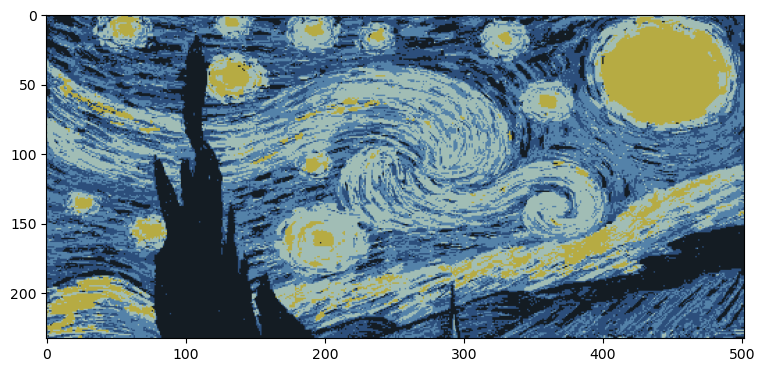

In [37]:
k=5 # number of clusters - feel free to play with it

image_values = image_to_matrix('images/Starry.png')
# Play with the K value below to see the effect number of clusters have͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
new_image = k_means_segment(image_values, k)

plt.figure(None,figsize=(9,12))
plt.imshow(new_image)
plt.show()


You can reuse the K-means visualization code from previous section to show the training progress on the image for different iterations and even numbers of clusters.

- - -

## Part 2: Implementing a Multivariate Gaussian Mixture Model (60 pts)

Next, we will step beyond clustering and implement a complete Gaussian mixture model.

But, before you dive into the code, you are highly encouraged to go over `read/gaussians.pdf` file before you start, to familiarize yourself with multivariate case of the Gaussian distribution.

In addition to that, there is a great ~17 minute video where Alexander Ihler goes over nuts and bolds of the multivariate EM algorithm details on Youtube:
https://www.youtube.com/watch?v=qMTuMa86NzU

Another resource you can refer to is the `read/em.pdf` document attached, which is a chapter from Pattern Recognition and Machine Learning book by Christopher M. Bishop.

- - - 

Now, it's time to complete the implementation of the functions below what will later assemble into a Multivariate Gaussian Expectation Maximization algorithm:

1. Calculate the probability of a given data point (e.g. rgb value of a pixel) of belonging to a specific Gaussian component. (7 points)

2. Use expectation-maximization (EM) to train the model to represent the image as a mixture of Gaussians. (20 points)

To initialize EM, set each component's mean to the means value of randomly chosen pixels (same as for K-means) and calculate covariances based on the selected means, and set the mixing coefficients to a uniform distribution. 

We've set the convergence condition for you in `default_convergence()` (see `helper_functions.py` file): if the new likelihood is within 10% of the previous likelihood for 10 consecutive iterations, the model has converged.

**Note:** there are packages that can run EM automagically, but you have to implement your own version of EM without using these extra packages. **It also means that you are not allowed to look into any implementations of the algorithms, e.g scikit-learn and many others. NumPy is your only tool here.** 

3. Calculate the log likelihood of the trained model. (7 points)
4. Segment the image according to the trained model. (7 points)
5. Determine the best segmentation by iterating over model training and scoring, since EM isn't guaranteed to converge to the global maximum. (7 points)

It'd be helpful to implement the above functions in the following order - 
1. initialize_parameters
2. prob
3. E_step
4. M_step
5. likelihood 
6. train_model
7. cluster
8. segment
9. best_segment

### Warning: You may lose all marks for this part if your code runs for too long.

**You will need to vectorize your code in this part. Specifically, the method E_step() and M_step() which make up the train_model(), perform operations using numpy arrays. These are time-sensitive functions and will be called over and over as you proceed with this assignment.**

For the synthetic data test which we provide to check if your training is working, the set is too small and it won't make a difference. But with the actual image that we use ahead, for-loops won't do good. Vectorized code would take under 30 seconds to converge which would typically involve about 15-20 iterations with the convergence function we have here. Inefficient code that uses loops or iterates over each pixel value sequentially, will take hours to run. You don't want to do that.

---

The following cell (compute_sigma) will not be graded, but we highly recommend using this function and paired test to make sure your covariance matrix implementation is correct. Computing the covariance matrix incorrectly can result in problems that become extremely hard to debug later in the assignment so please take advantage of this section.

In [4]:
#export
def compute_sigma(X, MU):
    """
    Calculate covariance matrix, based in given X and MU values
    
    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n
    MU = numpy.ndarray[numpy.ndarray[float]] - k x n
    
    returns:
    SIGMA = numpy.ndarray[numpy.ndarray[numpy.ndarray[float]]] - k x n x n
    """
    body = np.zeros((MU.shape[0], X.shape[0], X.shape[1]))
    for k in range(MU.shape[0]):
        body[k] = np.array([X[m] - MU[k] for m in range(X.shape[0])])
    sigma = np.array([np.matmul(body[k].T, body[k]) for k in range(body.shape[0])])/X.shape[0]
    return sigma
########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_gmm_covariance(compute_sigma)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


Same as in K-means you will be working with the data of size (m x n). 

In [5]:
#export
def initialize_parameters(X, k):
    """
    Return initial values for training of the GMM
    Set component mean to a random
    pixel's value (without replacement),
    based on the mean calculate covariance matrices,
    and set each component mixing coefficient (PIs)
    to a uniform values
    (e.g. 4 components -> [0.25,0.25,0.25,0.25]).
    
    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n
    k = int
    
    returns:
    (MU, SIGMA, PI)
    MU = numpy.ndarray[numpy.ndarray[float]] - k x n
    SIGMA = numpy.ndarray[numpy.ndarray[numpy.ndarray[float]]] - k x n x n
    PI = numpy.ndarray[float] - k 
    """
    MU = get_initial_means(X, k)
    SIGMA = compute_sigma(X, MU)
    PI = np.array([1/k for t in range(1, k+1)])
    return(MU,SIGMA,PI)

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_gmm_initialization(initialize_parameters)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


# NOTE:

### Be careful when coding up prob() below. It is fine for prob() to take the vectorized approach, but you may have to adjust your implementation to handle both cases. Specifically the case where x is a single datapoint and where x is an entire array of datapoints.

Note: prob function below gives a probability density estimate which we loosely (and definitely not accurately) call probability. As you can imagine the density function can take any value and can certainly be greater than 1. The prob function isn't really calculating probability but probability density.

In [28]:
#export
def prob(x, mu, sigma):
    """Calculate the probability of x (a single
    data point or an array of data points) under the
    component with the given mean and covariance.
    The function is intended to compute multivariate
    normal distribution, which is given by N(x;MU,SIGMA).

    params:
    x = numpy.ndarray[float] (for single datapoint) a
        or numpy.ndarray[numpy.ndarray[float]] (for array of datapoints)
    mu = numpy.ndarray[float]
    sigma = numpy.ndarray[numpy.ndarray[float]]

    returns:
    probability = float (for single datapoint) 
                or numpy.ndarray[float] (for array of datapoints)
    """
    probib = None
    bridge = x
    if len(x.shape) == 1 :
        bridge = np.empty((1,len(x)))
        bridge = np.array([x])
    body = bridge - mu
    exponent = -1/2 * np.einsum('ij,ji->i', np.dot(body, np.linalg.pinv(sigma)), body.T)
    dinom = 1/(np.sqrt((2*np.pi)**bridge.shape[1] *(np.linalg.det(sigma))))
    probib = (dinom)*np.exp(exponent)
    if len(x.shape) == 1:
        return probib[0]
    
    return probib

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_gmm_prob(prob)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


In [9]:
#export
def E_step(X,MU,SIGMA,PI,k):
    """
    E-step - Expectation 
    Calculate responsibility for each
    of the data points, for the given 
    MU, SIGMA and PI.
    
    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n
    MU = numpy.ndarray[numpy.ndarray[float]] - k x n
    SIGMA = numpy.ndarray[numpy.ndarray[numpy.ndarray[float]]] - k x n x n
    PI = numpy.ndarray[float] - k
    k = int
    
    returns:
    responsibility = numpy.ndarray[numpy.ndarray[float]] - k x m
    """
    m, n = X.shape
    responsibility = np.zeros((k, m))
    responsibility = np.array([PI[i] * prob(X, mu=MU[i, :], sigma=SIGMA[i, :, :]) for i in range(k)])
    responsibility /= np.sum(responsibility, axis=0)
    return responsibility

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_gmm_e_step(E_step)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


In [10]:
#export
def M_step(X, r, k):
    """
    M-step - Maximization
    Calculate new MU, SIGMA and PI matrices
    based on the given responsibilities.
    
    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n
    r = numpy.ndarray[numpy.ndarray[float]] - k x m
    k = int
    
    returns:
    (new_MU, new_SIGMA, new_PI)
    new_MU = numpy.ndarray[numpy.ndarray[float]] - k x n
    new_SIGMA = numpy.ndarray[numpy.ndarray[numpy.ndarray[float]]] - k x n x n
    new_PI = numpy.ndarray[float] - k
    """
    m, n = X.shape
    new_PI = np.mean(r, axis=1)
    new_MU = np.zeros((k, n))
    new_MU = np.array([np.sum(r[k].reshape(-1, 1) * X, axis=0) / np.sum(r[k]) for k in range(k)])
    new_SIGMA = np.zeros((k, n, n))
    for i in range(k):
        X_centered = X - new_MU[i]
        new_SIGMA[i] = (X_centered.T * r[i]).dot(X_centered) / np.sum(r[i])

    return (new_MU, new_SIGMA, new_PI)
     

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_gmm_m_step(M_step)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


In [29]:
#export
def loglikelihood(X, PI, MU, SIGMA, k):
    """Calculate a log likelihood of the 
    trained model based on the following
    formula for posterior probability:
    
    log(Pr(X | mixing, mean, stdev)) = sum((i=1 to m), log(sum((j=1 to k),
                                      mixing_j * N(x_i | mean_j,stdev_j))))

    Make sure you are using natural log, instead of log base 2 or base 10.
    
    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n
    MU = numpy.ndarray[numpy.ndarray[float]] - k x n
    SIGMA = numpy.ndarray[numpy.ndarray[numpy.ndarray[float]]] - k x n x n
    PI = numpy.ndarray[float] - k
    k = int

    returns:
    log_likelihood = float
    """
    
    weighted = 0
    for j in range(k):
        weighted += PI[j] *prob(X, mu=MU[j], sigma=SIGMA[j])
    return np.sum(np.log(weighted))


########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_gmm_likelihood(loglikelihood)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


In [30]:
#export
def train_model(X, k, convergence_function, initial_values = None):
    """
    Train the mixture model using the 
    expectation-maximization algorithm. 
    E.g., iterate E and M steps from 
    above until convergence.
    If the initial_values are None, initialize them.
    Else it's a tuple of the format (MU, SIGMA, PI).
    Convergence is reached when convergence_function
    returns terminate as True,
    see default convergence_function example 
    in `helper_functions.py`

    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n
    k = int
    convergence_function = func
    initial_values = None or (MU, SIGMA, PI)

    returns:
    (new_MU, new_SIGMA, new_PI, responsibility)
    new_MU = numpy.ndarray[numpy.ndarray[float]] - k x n
    new_SIGMA = numpy.ndarray[numpy.ndarray[numpy.ndarray[float]]] - k x n x n
    new_PI = numpy.ndarray[float] - k
    responsibility = numpy.ndarray[numpy.ndarray[float]] - k x m
    """
    
    MU, SIGMA, PI = initialize_parameters(X, k)
    if initial_values is not None:
        MU, SIGMA, PI = initial_values
    
    old_likelihood = 0
    new_likelihood = loglikelihood(X, PI, MU, SIGMA, k)
    count = 0
    convrged = False
    while not convrged:
        responsibility = E_step(X, MU, SIGMA, PI, k)
        MU, SIGMA, PI = M_step(X, responsibility, k)
        old_likelihood = new_likelihood
        new_likelihood = loglikelihood(X, PI, MU, SIGMA, k)
        count, convrged = convergence_function(old_likelihood, new_likelihood, count)
    
    return MU, SIGMA, PI, responsibility

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_gmm_train(train_model, loglikelihood)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


In [13]:
#export
def cluster(r):
    """
    Based on a given responsibilities matrix
    return an array of cluster indices.
    Assign each datapoint to a cluster based,
    on component with a max-likelihood 
    (maximum responsibility value).
    
    params:
    r = numpy.ndarray[numpy.ndarray[float]] - k x m - responsibility matrix
    
    return:
    clusters = numpy.ndarray[int] - m x 1 
    """
    return(np.argmax(r, axis=0))

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_gmm_cluster(cluster)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


In [14]:
#export
def segment(X, MU, k, r):
    """
    Segment the X matrix into k components. 
    Returns a matrix where each data point is 
    replaced with its max-likelihood component mean.
    E.g., return the original matrix where each pixel's
    intensity replaced with its max-likelihood 
    component mean. (the shape is still mxn, not 
    original image size)

    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n
    MU = numpy.ndarray[numpy.ndarray[float]] - k x n
    k = int
    r = numpy.ndarray[numpy.ndarray[float]] - k x m - responsibility matrix

    returns:
    new_X = numpy.ndarray[numpy.ndarray[float]] - m x n
    """
    clusters = cluster(r)
    return(MU[clusters])

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_gmm_segment(train_model, segment)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


In [31]:
#export
def best_segment(X,k,iters):
    """Determine the best segmentation
    of the image by repeatedly
    training the model and
    calculating its likelihood.
    Return the segment with the
    highest likelihood.

    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n
    k = int
    iters = int

    returns:
    (likelihood, segment)
    likelihood = float
    segment = numpy.ndarray[numpy.ndarray[float]]
    """

    best_likelihood = 0
    best_segment = None

    for i in range(iters):
        MU, SIGMA, PI, responsibility = train_model(X, k, convergence_function=default_convergence)
        print(MU.shape)

        likelihood = loglikelihood(X, PI, MU, SIGMA, k)
        if likelihood > best_likelihood:
            best_likelihood = likelihood
            best_segment = segment(X,MU,k, responsibility)

    return (best_likelihood, best_segment)

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_gmm_best_segment(best_segment)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
(3, 3)
UnitTest passed successfully!


#### GMM - Visualizing the results

Now that you are done with the EM implementation lets try to visualize what's happening if you repeat these steps multiple times.

**You don't need to be implementing anything in the next 2 cells, but you are highly encouraged to play with parameters and datasets, to get a visual sense of what is happening at every step.**


Feel free to explore and improve the function below, it will be used for visualizing GMM progress
but it's not required and WON'T effect your grade.

In [ ]:
def GMM_2D_dataset(dataset_index, K):
    # Load the dataset from data folder͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    X = np.loadtxt("data/%d_dataset_X.csv" % dataset_index, delimiter=",")
    print("There are %d datapoints in the current dataset, each of a size %d" % X.shape)
    print("""\nNote that that the Gaussian Ellipses and Normal Curves may not share the
same color as the points they represent (within the same chart).
In fact, the Gaussian Ellipses and Normal Curves represent the clusters
in the top left chart (and thus share colors with those points).""")
    # Load the labels͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    # Clustering is unsupervised method, where no labels are provided͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    # However, since we generated the data outselves we know the labels,͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    # and load them for illustration purposes.͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    y = np.int16(np.loadtxt("data/%d_dataset_y.csv" % dataset_index, delimiter=","))
    # Feel free to edit the termination condition for the EM algorithm͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    # Currently is just runs for n_iterations, before terminating͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    
    MU, SIGMA, PI = initialize_parameters(X, K)
    
    clusters_history = []
    statistics_history = []
    for _ in range(200):
        r = E_step(X,MU,SIGMA,PI,K)
        new_MU, new_SIGMA, new_PI = M_step(X, r, K)
        PI, MU, SIGMA = new_PI, new_MU, new_SIGMA
        clusters = cluster(r)
        clusters_history.append(clusters)
        statistics_history.append((PI, MU, SIGMA))

    return X, y, clusters_history, statistics_history

In [ ]:
# TRY DIFFERENT PARAMETERS͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
dataset_index = 3 # for different dataset change it to number from [0,5]
K = 3 # Number of clusters - play with this number

X, y, clusters_history, statistics_history = GMM_2D_dataset(dataset_index, K)

def setup_subplot(plt, i, title, plot_number):
    ax = plt.subplot(2, 2, plot_number)
    ax.set_title(title)
    ax.patch.set_facecolor('gray')
    ax.patch.set_alpha(0.1)
    return ax

def plot_gaussian_ellipse(k, mean, covar, ax2, colors):
    v,w = np.linalg.eig(covar)
        
    angle = np.arctan(w[1,0] / w[0,0])
    angle = 180 * angle / np.pi
    
    color = colors[k % len(colors)]
    for i in range(3,8):
        plot_v = i * np.sqrt(v)
        ellipse = pat.Ellipse(mean, plot_v[0], plot_v[1], angle, fill = True, alpha = 0.10, lw = 1.0, ls = 'dashdot', ec = 'black', fc = color, zorder = 0)
        ax2.add_artist(ellipse)

def plot_gaussian(X, mean, var, X_min, X_max, ax):
    samples = np.linspace(X_min, X_max, 100)
    ax.plot(samples, norm.pdf(samples, mean, var))
    

# This is an interactive cell to see the progress of training your GMM algorithm.͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# Feel free to improve the visualization code and share it with your classmates on Piazza.͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
def get_cluster(i):
    clusters = clusters_history[i] # Get the clusters from K-means' i-th iteration
    cluster_means = statistics_history[i][1]
    cluster_covar = statistics_history[i][2]
    
    plt.figure(None, figsize=(15,12)) # Set the plot size
    plt.suptitle('Drag the slider to see the algorithm training progress')
    
    ax1 = setup_subplot(plt, i, 'GMM clusters - step %d' % i, 1)
    ax2 = setup_subplot(plt, i, 'Ground truth clusters', 2)
    ax3 = setup_subplot(plt, i, 'GMM Gausians X1 - step %d' % i, 3)
    ax4 = setup_subplot(plt, i, 'GMM Gausians X2 - step %d' % i, 4)
    
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for k in range(K):
        ax1.plot(X[clusters==k, 0], X[clusters==k, 1], '.')
        
        mean = cluster_means[k]
        covar = cluster_covar[k]
        
        plot_gaussian_ellipse(k, mean, covar, ax2, colors)
        plot_gaussian(X[clusters==k, 0], mean[0], covar[0,0], np.min(X[:, 0]), np.max(X[:, 0]), ax3)
        plot_gaussian(X[clusters==k, 1], mean[1], covar[1,1], np.min(X[:, 1]), np.max(X[:, 1]), ax4)
    
    ax3.set_prop_cycle(None)
    ax4.set_prop_cycle(None)
    # Just to get a flavour of how the data looks like͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    for i in np.unique(y):
        ax2.plot(X[y==i,0], X[y==i,1],'.', zorder=10)
        ax3.plot(X[y==i,0], np.zeros(X[y==i,0].shape[0]), '.', zorder = 10)
        ax4.plot(X[y==i,1], np.zeros(X[y==i,1].shape[0]), '.', zorder = 10)
    
    plt.show()

interactive(get_cluster, {'manual': True}, i=(0,len(clusters_history)-1,1))

### Let's visualize the image compression results of GMM.

In [ ]:
image_file = 'images/Starry.png' # Image path
original_image_matrix = image_to_matrix(image_file) # Save original image
image_matrix = original_image_matrix.reshape(-1,3) # collapse the dimension
K = 10 # K

_, best_seg = best_segment(image_matrix, K, iters = 10)
new_image = best_seg.reshape(*original_image_matrix.shape) # reshape collapsed matrix to original size
# Show the image͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
plt.figure(None,figsize=(9,12))
plt.imshow(new_image)
plt.show()

---

## Part 4 (extra for cs3600): Bayesian Information Criterion (12 pts)

In our previous solutions, our only criterion for choosing a model was whether it maximizes the posterior likelihood regardless of how many parameters this requires. As a result, the "best" model may simply be the model with the most parameters, which would be overfit to the training data.

To avoid overfitting, we can use the [Bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion) (a.k.a. BIC) which penalizes models based on the number of parameters they use. In the case of the Gaussian mixture model, this is equal to the number of components times the number of variables per component (mean, variance and mixing coefficient).

hint: 

## Part 4a: Implement BIC

#### 4 points

Implement `bayes_info_criterion()` to calculate the BIC of a trained Gaussian Mixture Model (based on the given parameters).

Note: In the formula of BIC,  `k`  is the number of parameters estimated by the model. This is different from 'k', the number of clusters.

In [32]:
#export
def bayes_info_criterion(X, PI, MU, SIGMA, k):
    """
    See description above
    params:
    X = numpy.ndarray[numpy.ndarray[float]] - m x n
    MU = numpy.ndarray[numpy.ndarray[float]] - k x n
    SIGMA = numpy.ndarray[numpy.ndarray[numpy.ndarray[float]]] - k x n x n
    PI = numpy.ndarray[float] - k
    k = int
    
    return:
    bayes_info_criterion = int
    """
    m, n = X.shape
    likelihood = loglikelihood(X, PI, MU, SIGMA, MU.shape[0])
    num_params = k * (n + n*(n+1)//2 + 1) - 1
    return np.log(m)* num_params -2*likelihood

########## DON'T WRITE ANY CODE OUTSIDE THE FUNCTION! ################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
##### CODE BELOW IS USED FOR RUNNING LOCAL TEST DON'T MODIFY IT ######͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
tests.GMMTests().test_bayes_info(bayes_info_criterion)
################ END OF LOCAL TEST CODE SECTION ######################͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃

UnitTest passed successfully!


## Part 4b: Test BIC

#### 8 points

Now implement `BIC_likelihood_model_test()`, in which you will use the BIC and likelihood to determine the optimal number of components in the `image_matrix` parameter. Using `train_model()`, iterate over the list of provided means (`comp_means`) to train a model that minimizes its BIC and a model that maximizes its likelihood. 

Return:

1) The number of components which result in the minimum BIC

2) The number of components which result in the highest likelihood

`comp_means` is a list, where each element is a k x n matrix of means (where k = # of clusters).

In [34]:
#export
def BIC_likelihood_model_test(image_matrix, comp_means):
    """Returns the number of components
    corresponding to the minimum BIC 
    and maximum likelihood with respect
    to image_matrix and comp_means.
    
    params:
    image_matrix = numpy.ndarray[numpy.ndarray[float]] - m x n
    comp_means = list(numpy.ndarray[numpy.ndarray[float]]) - list(k x n) (means for each value of k)

    returns:
    (n_comp_min_bic, n_comp_max_likelihood)
    n_comp_min_bic = int
    n_comp_max_likelihood = int
    """
    n_comp_min_bic = None
    n_comp_max_likelihood = None
    min_bic = 0
    max_likelihood = 0
    for k, means in enumerate(comp_means, start=1):
        pi, mu, sigma, r = train_model(image_matrix, k=k, means=means)

        bic = bayes_info_criterion(image_matrix, pi, mu, sigma, k)
        
        if bic < min_bic:
            min_bic = bic
            n_comp_min_bic = k
        likelihood = loglikelihood(image_matrix, pi, mu, sigma, mu.shape[0])
        if likelihood > max_likelihood:
            max_likelihood = likelihood
            n_comp_max_likelihood = k

    return n_comp_min_bic, n_comp_max_likelihood

## Part 5: Return your name

#### 1 point

A simple task to wind down the assignment. Return your name from the function aptly called `return_your_name()`.


In [12]:
#export
def return_your_name():
    return("Kiavosh Peynabard")

---

## Congrats, you are done with the part of the assignment which is graded
### Please follow the instructions in the README to submit your code for grading.

- - -


Next is as promised segmentation of the Point Cloud data. 

If you run into issues with `open3d` library below, please refer to official Open3d documentation http://www.open3d.org/docs/getting_started.html for details about the installation and library itself.

RGBD (**RGB** + **D**epth) data is usually stored as two separated images, one contains RGB (color) information and second one contains only depth, thus is a grayscale image. Let's load a data sample visualize it.

In [ ]:
import open3d as o3d

In [ ]:
# Function below load the data͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
def load_rgbd_image(image_path, depth_path):
    color_raw = o3d.io.read_image(image_path)
    depth_raw = o3d.io.read_image(depth_path)
    #  details about function http://www.open3d.org/docs/tutorial/Basic/rgbd_odometry.html͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    # We are using a data sample from the SUN RGB-D (http://rgbd.cs.princeton.edu/) dataset͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    return color_raw, depth_raw

# We can plot these images separately using the function below͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
def plot_rgbd(color_image, depth_image):
    plt.figure(None,(15,15))
    plt.subplot(1, 3, 1)
    plt.title('Color image')
    plt.imshow(color_image)
    plt.subplot(1, 3, 2)
    plt.title('SUN depth image')
    plt.imshow(depth_image)
    plt.show()

In [ ]:
import glob
from PIL import Image
%matplotlib inline
rgbd_dataset = glob.glob('rgbd/image/*.jpg') # TODO fix it
image_number = 3 # [0,4] there are five different images in the folder

image_file = rgbd_dataset[image_number]
depth_file = image_file.replace('image','depth')[:-4] + '.png'
assert os.path.isfile(image_file); 
assert os.path.isfile(depth_file);
color_image, depth_image = load_rgbd_image(image_file, depth_file)
plot_rgbd(color_image, depth_image)

In [ ]:
# Next we can convert the depth image into a point cloud͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃ 
def show_point_cloud(color_raw, depth_raw):
    rgbd_image = o3d.geometry.RGBDImage.create_from_sun_format(color_raw, depth_raw);
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, 
                 o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
    # Flip it, otherwise the pointcloud will be upside down͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
    pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
    o3d.visualization.draw_geometries([pcd])
    return pcd

In [ ]:
pcd = show_point_cloud(color_image, depth_image)

In [ ]:
# Lets have a look at the structure of the point cloud data͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
pcd_points = np.asarray(pcd.points)
print("Point cloud data - shape:", pcd_points.shape)

Point cloud data is represented as an unsorted set of the size M x N., where M is the number of points and N is the x,y,z value for each point. If you are interested you can access the color data in `pcd.colors`.

Let us try to perform a segmentation on the image we just loaded.

In [ ]:
# Setting the number of clusters͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
K = 5
# Note: it's just a simple train model run͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# To improve it you can adapt the best_segment()͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃ 
# to generate the clusters with the best model͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
initial_params = initialize_parameters(pcd_points, K)
MU, SIGMA, PI, r = train_model(pcd_points, K,
                               convergence_function=default_convergence,
                               initial_values=initial_params)
clusters = cluster(r)

In [ ]:
# Generate a set of size K of distinct color to plot the clusters͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
# Adapted from https://stackoverflow.com/questions/876853/generating-color-ranges-in-python͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏󠄇͏︊͏︃
import colorsys
HSV_tuples = [(x*1.0/K, 1.0, 1.0) for x in range(K)]
color_maps = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))

### Visualizing the segmented point cloud data!

In [ ]:
or_pcd = o3d.geometry.PointCloud() # Create new point cloud handler
or_pcd.points = o3d.utility.Vector3dVector(pcd_points) # set point cloud data
colors = np.zeros_like(pcd_points) # initialize colors to 0
for i, point in enumerate(np.unique(clusters)):
    random_color = color_maps[i]
    cluster_mask = (clusters == point) # get the mask of the cluster i
    colors[cluster_mask,:] = random_color # set random color to all the point of this segment
or_pcd.colors = o3d.utility.Vector3dVector(colors) # set color data
o3d.visualization.draw_geometries([or_pcd]) # visualize point cloud

Some questions to think about:
- Would adding a color help or harm the segmentation results?
- How about the case: segment RGB data -> add depth -> convert to Point Cloud -> cluster? Would that help/harm?
- Could you think of a way you could compress the point cloud data?

Things to try:
- Segmentation here is done in purely unsupervised manner, you could manually combine multiple gaussian
- How about merging multiple scenes into a single one? You could crop one segment from one scene and place it inside another scene.
- Try K-means on point cloud data and see what results does it produces
- Can we omit the step of conversion to point cloud? And use depth only? Or depth with x,y coordinates?